In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import spacy

In [2]:
import seaborn as sns
from collections import Counter

In [3]:
books = pd.read_csv('books_data.csv')
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [4]:
books_df = books[['Title', 'description', 'publishedDate']].copy()

In [5]:
books_df["Title"] = books_df["Title"].astype(str)

In [6]:
books_df

,Title,description,publishedDate
0,Its Only Art If Its Well Hung!,NaN,1996
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,2005-01-01
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,2000
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,2005-02
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,2003-03-01
...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",2000-06-01
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,1995
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",2018-01-17
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,2003-08-12


Histogram of Book Title by character level

<Axes: >

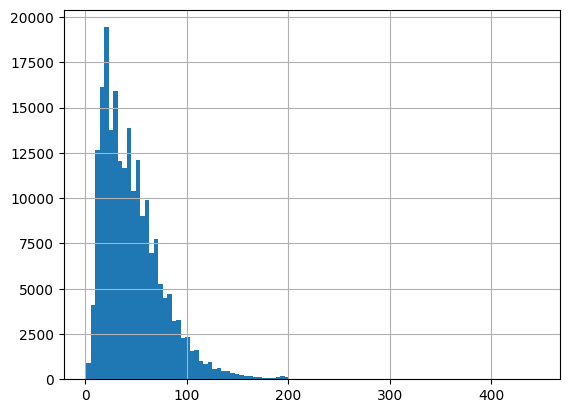

In [7]:
books_df['Title'].str.len().hist(bins=100)

Histogram of Book Title by word level

In [8]:
def plot_word_number_hist(text: str, bins: int):
  text.str.split().\
  map(lambda x: len(x)).\
  hist(bins=bins)

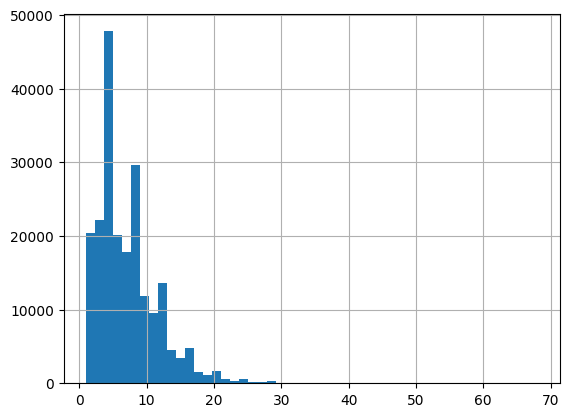

In [9]:
plot_word_number_hist(books_df['Title'], 50)

In [10]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
corpus=[]
bk= books_df['Title'].str.split()
bk=bk.values.tolist()
corpus=[word for i in bk for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

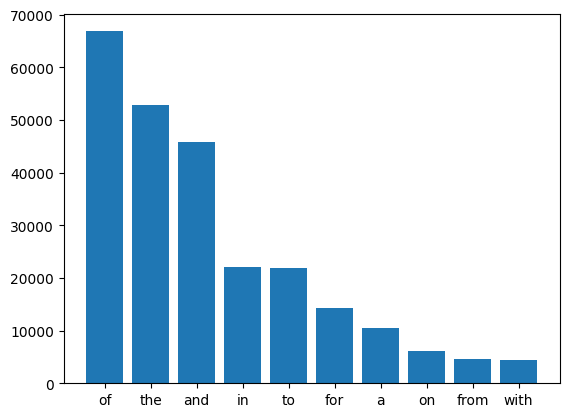

In [12]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)

<Axes: >

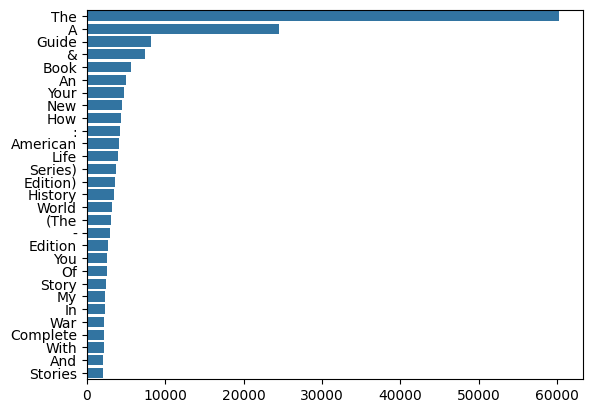

In [13]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [14]:
from nltk.util import ngrams

In [15]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

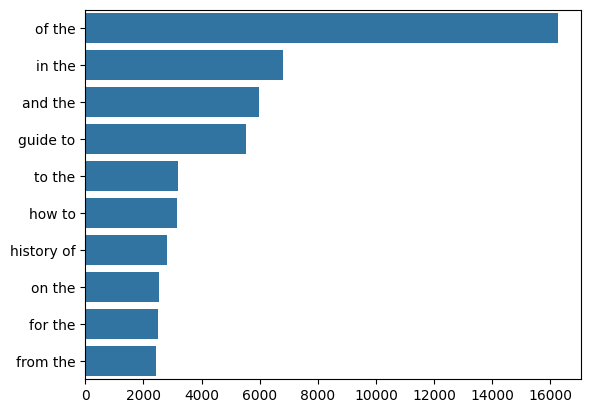

In [16]:
top_n_bigrams=get_top_ngram(books_df['Title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<Axes: >

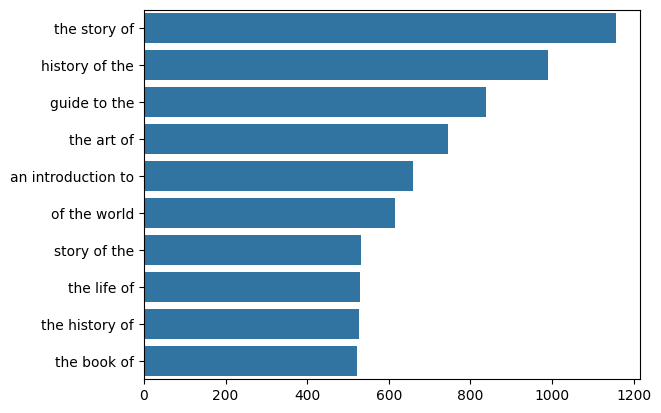

In [17]:
top_n_trigrams=get_top_ngram(books_df['Title'], 3)[:10]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

In [18]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
nlp = spacy.load("en_core_web_sm")

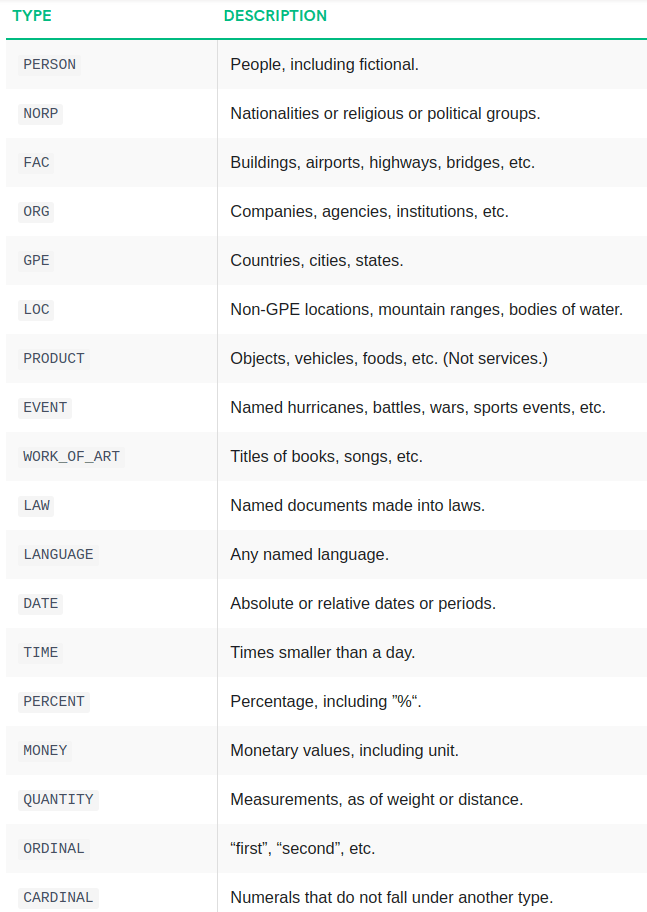

In [20]:
def ner(text):
  doc=nlp(text)
  return [X.label_ for X in doc.ents]

ent=books_df['Title'].apply(lambda x: ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

<Axes: >

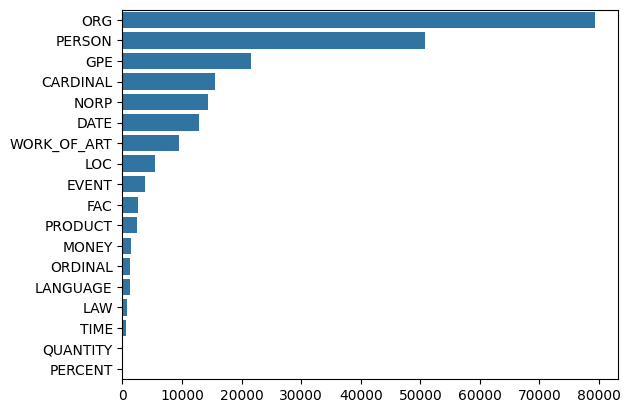

In [21]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

In [22]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=books_df['Title'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)



TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

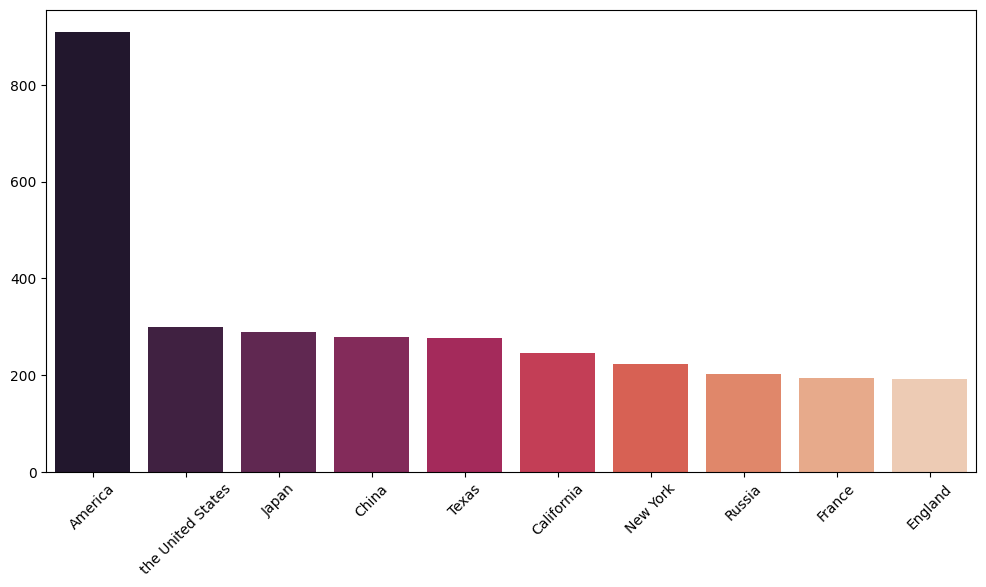

In [31]:
plt.figure(figsize=(12, 6))
#ax = sns.barplot(x=x, y=y, palette="rocket", legend=True)
ax = sns.barplot(x=x, y=y, hue=x, legend=False, palette='rocket')
ax.tick_params(axis='x', labelrotation=45)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")